Project: **Machine Learning Programming Project 2 Part 1** 
<br>
Team Members: **Debit Paudel, Kushal Dahal**
<br>
We have used github for the collaboration.
<br>
Github Link: https://github.com/debit7/Bayes_Algorithm_ML

Initially, Dataset 'fishing.data' consisting 14 instances of data points. There are four attributes Wind, Air, Water and Sky which are assumed to be independent to each other. Our aim is to classify fishing as yes or no depending on those four attributes. We have built an Naive Bayes model from scratch and implemented the model to predict if it is a good day to fish or not providing new instances.
The data set is opened below and panda is used to build the dataframe named 'df' with headers.

In [2]:
import pandas as pd
with open('fishing.data') as f:
        lst = []
        for ele in f:
            line = ele.replace('\n','').split(' ')
            sublst=[]
            
            lst.append(line)
Headers=['Fish', 'Wind', 'Air','Water','Sky']
df = pd.DataFrame(lst, columns =Headers) 

After reading the dataset, we have followed dynamic programming approach building functions to perform the calulation portion of Naive Bayes building a model. Below we have written a count function to

In [3]:
def count(data,colname,label,target):
    condition = (data[colname] == label) & (data[Headers[0]] == target)
    return len(data[condition])
total_data=14
total_yes=count(df,'Fish','Yes','Yes')
total_no=count(df,'Fish','No','No')

Below we have built a probabilities function where we have

In [4]:
def probabilities(colname,param,Fish):
    if Fish=='Yes':
        param_yes=count(df,colname,param,Fish)
        return param_yes/total_yes
    if Fish=='No':
        param_no=count(df,colname,param,Fish)
        return param_no/total_no

We have built all_probabilities function to

In [5]:
def all_probabilities(instances):
    P_yes=float(total_yes/total_data)
    P_no=float(total_no/total_data)
    c=1
    prob_yes=1
    prob_no=1
    for inst in instances:
        prob_yes*=probabilities(Headers[c],inst,'Yes')
        prob_no*=probabilities(Headers[c],inst,'No')
        c=c+1
    
    class_yes=P_yes*prob_yes
    class_no=P_no*prob_no
    if class_yes>class_no:
        take,val= class_yes,'Yes'
    else:
        take,val= class_no,'No'
    return (take/(class_yes+class_no))*100,val

In [6]:
def NaiveBAyes(instances):
 return all_probabilities(instances)

In [9]:
instance=['Strong','WarmAir','Cold','Sunny']
Accuracy, Class=NaiveBAyes(instance)
print("Fishing Day:",Class)
print("Accuracy of the model:",Accuracy)

Fishing Day: Yes
Accuracy of the model: 75.98499061913697


After implementing all the steps of naive bayes algorithms in above functions, we are building Naivebayes function which can be called whenever we need to classify the new instances fish= yes or no. So for a new instance below, we have predicted either it is a suitable day for fishing.
In the above prediction, we have predicted the fish as yes with an accuracy of 75.98 percentage based on the values of other four attributes. 

**Approach and Problem Encountered:**
<br>
While following the steps of naive bayes to build the model in python, we have face several problems.

**Validation in R:**

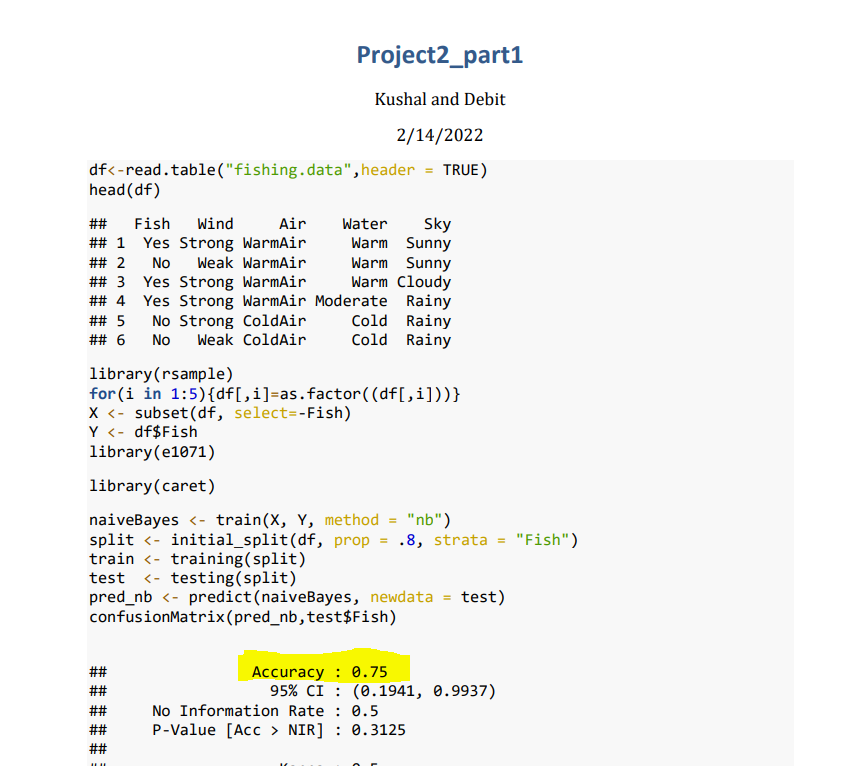

In [40]:
from IPython.display import Image
Image("img/p1validation.PNG")


**Comparision of Accuracy of two models:**
We implemented the steps of naive bayes algorithm in python and built a model with an accuracy of 75.98%.
For the validation, we used the pre build naive bayes function in R under library e1071 where we got the accuracy of 75%. So both of the accuracy are almost similar to each other. After validating our work, we feel that our naive model is working fine. While visualizing the accuracy in bar chart we can see that they too are similar.

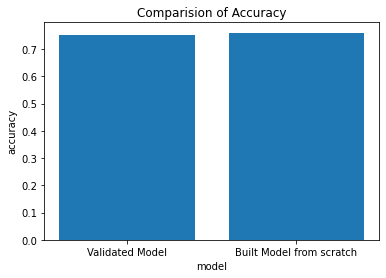

In [67]:
import matplotlib.pyplot as plt
model=['Validated Model','Built Model from scratch']
accuracy=[0.75,0.7598]
plt.bar(model, accuracy)
plt.title('Comparision of Accuracy')
plt.xlabel('model')
plt.ylabel('accuracy')
plt.show()
